In [31]:
#Least angle regression using Batch Gradient Descent  and Stochastic Gradient Descent

In [141]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#only for jupyter notebook
%matplotlib inline 

In [142]:
dataSet = 'data.xlsx'

In [143]:
#header = None states that there is no header row or else it would take first row of our data as header.
df = pd.read_excel(dataSet,sheet_name='Sheet1',header=None)

In [144]:
valueArray = df.to_numpy() #dataframe DF to numpyarray valueArray
m = valueArray.shape[0] # Number of training examples   numpyArray.shape = (no of rows,no of cols)
X = valueArray[0:,0:2] # Feature Vector [x1,x2] m*2 0: = 0,1,2 rows and 0:2 = 0,1 columns
X = np.insert(X,0,1,axis=1) # axis = 1 (every row insert 1 at 0 column) , Adding x0 = 1 in feature matrix m*3
y = valueArray[0:,2:] # Class label Vector [y]  0: = 0,1,2 rows and 2: = 2 column   y = m*1 matrix

In [145]:
#Normalization
X[0:,1:2] = (X[0:,1:2] - X[0:,1:2].mean())/(X[0:,1:2].std())
X[0:,2:] = (X[0:,2:] - X[0:,2:].mean())/(X[0:,2:].std())

In [146]:
def computeCostFunction(X,y,w):
    sum = 0.0
    for index in range(X.shape[0]):
        sum += (y[index][0] - (w[0][0] * X[index][0] + w[1][0] * X[index][1] + w[2][0] * X[index][2]))**2
    #adding sum of squares of weights multiplied by regularization parameter
    sum += regParameter*(abs(w[1][0]) + abs(w[2][0]))
    return 0.5 * (sum/m)

In [147]:
#Implementing Batch Gradient Descent

In [149]:
for i in range(iters):
    #wj <- wj + for all points (h(x) - y)*xj
    w0 = w1 = w2 = sum0 = sum1 = sum2 = 0.0 # will hold new values of weights after weight update
    for xIndex in range(m):
        sum0 += (X[xIndex][0]*w[0][0] + X[xIndex][1]*w[1][0] + X[xIndex][2]*w[2][0] - y[xIndex][0])*X[xIndex][0]
        sum1 += (X[xIndex][0]*w[0][0] + X[xIndex][1]*w[1][0] + X[xIndex][2]*w[2][0] - y[xIndex][0])*X[xIndex][1]
        sum2 += (X[xIndex][0]*w[0][0] + X[xIndex][1]*w[1][0] + X[xIndex][2]*w[2][0] - y[xIndex][0])*X[xIndex][2]
    w[0][0] = w[0][0] - alpha*sum0/m
    w[1][0] = w[1][0] - (alpha/m)*(sum1 + 0.5 * regParameter * (abs(w[1][0])/w[1][0]) )
    w[2][0] = w[2][0] - (alpha/m)*(sum2 + 0.5 * regParameter * (abs(w[1][0])/w[1][0]) )
    cost = computeCostFunction(X,y,w)
    costs.append(cost)
    iterations.append(i+1)
    weight1.append(w1)
    weight2.append(w2)

In [150]:
#RESULTS

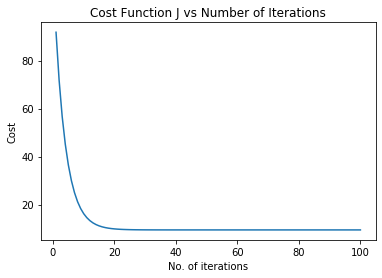

In [151]:
#2D - Plot of cost function vs number of iterations
plt.title('Cost Function J vs Number of Iterations')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(iterations,costs)
plt.show()

In [152]:
w

array([[14.90478629],
       [ 0.36514491],
       [ 1.69436918]])

In [153]:
costs[len(iterations)-1]

9.409142873251163

In [43]:
#Implementing Stochastic Gradient Descent

In [300]:
alpha = 0.75
iters = 200
costs = []
iterations = []
weight1 = []
weight2 = []
batchSize = 40
#Regularization
regParameter = 0.15
np.random.seed(22) 
w = np.random.rand(3,1) #Weight matrix with random values 3*1 matrix
print(w)

[[0.20846054]
 [0.48168106]
 [0.42053804]]


In [301]:
def generateMiniBatch(X,y):
    data = np.hstack((X,y)) #X and y are combined row-wise
    np.random.shuffle(data)
    miniBatch = []
    for index in range(batchSize):
        miniBatch.append([data[index][0],data[index][1],data[index][2],data[index][3]])
    return miniBatch

In [302]:
#In each iteration take random 30 points from 'm' points and calculate gradient wrt each of the 30 points and update the weights
for i in range(iters):
    w0 = w1 = w2 = grad0 = grad1 = grad2 = 0.0 # will hold new values of weights after weight update
    miniBatch = generateMiniBatch(X,y)
    X_mini = []
    y_mini = []
    for arr in miniBatch:
        X_mini.append([arr[0],arr[1],arr[2]])
        y_mini.append([arr[3]])
    for xIndex in range(batchSize):
        grad0 = (X_mini[xIndex][0]*w[0][0] + X_mini[xIndex][1]*w[1][0] + X_mini[xIndex][2]*w[2][0] - y_mini[xIndex][0])*X_mini[xIndex][0]
        grad1 = (X_mini[xIndex][0]*w[0][0] +X_mini[xIndex][1]*w[1][0] + X_mini[xIndex][2]*w[2][0] - y_mini[xIndex][0])*X_mini[xIndex][1]
        grad2 = (X_mini[xIndex][0]*w[0][0] + X_mini[xIndex][1]*w[1][0] + X_mini[xIndex][2]*w[2][0] - y_mini[xIndex][0])*X_mini[xIndex][2]
        w[0][0] = w[0][0] - (alpha/m)*grad0
        w[1][0] = w[1][0] - (alpha/m)*(grad1 + 0.5 * regParameter * (abs(w[1][0])/w[1][0]) )
        w[2][0] = w[2][0] - (alpha/m)*(grad2 + 0.5 * regParameter * (abs(w[1][0])/w[1][0]) )
    cost = computeCostFunction(X,y,w)
    costs.append(cost)
    iterations.append(i+1)
    weight1.append(w1)
    weight2.append(w2)

In [303]:
#RESULTS

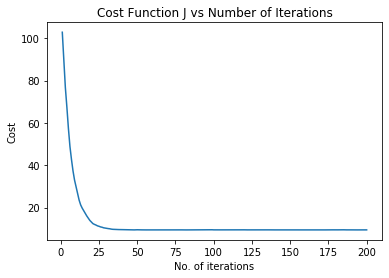

In [304]:
#2D - Plot of cost function vs number of iterations
plt.title('Cost Function J vs Number of Iterations')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(iterations,costs)
plt.show()

In [305]:
#3D Surface Graph of cost function vs w1 and w2

In [306]:
#2D contour plot of cost function vs w1 and w2

In [307]:
w

array([[15.08382559],
       [ 0.29797433],
       [ 1.78106739]])

In [308]:
costs[len(iterations)-1]

9.424151696377528

In [310]:
w[0][0]

15.083825592102865

In [311]:
y_pred = []
for index in range(m):
        y_pred.append([(w[0][0] * X[index][0] + w[1][0] * X[index][1] + w[2][0] * X[index][2])])
mse = np.sum((y-y_pred)**2)
rmse = np.sqrt(mse/m)
print(rmse)

4.341360365347999
